In [ ]:
import pandas as pd 
import matplotlib as plt
import   as sns

In [188]:
df = pd.read_csv("Books_Data_Clean.csv")

In [189]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [190]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [191]:
df = df[df["Publishing Year"] > 1900]

In [192]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [193]:
df.dropna(subset = "Book Name", inplace = True)

In [194]:
df.duplicated().sum()

np.int64(0)

In [195]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

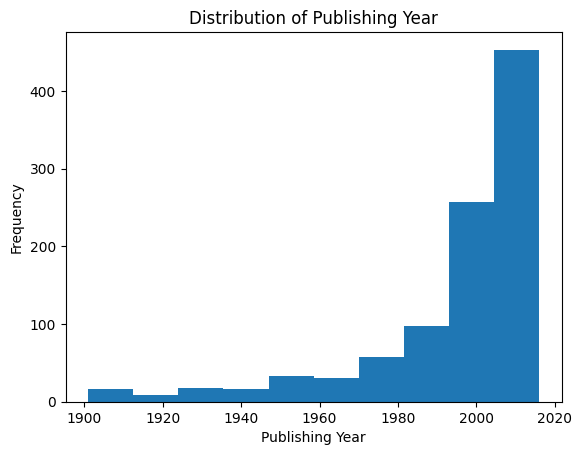

In [196]:
import matplotlib.pyplot as plt
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

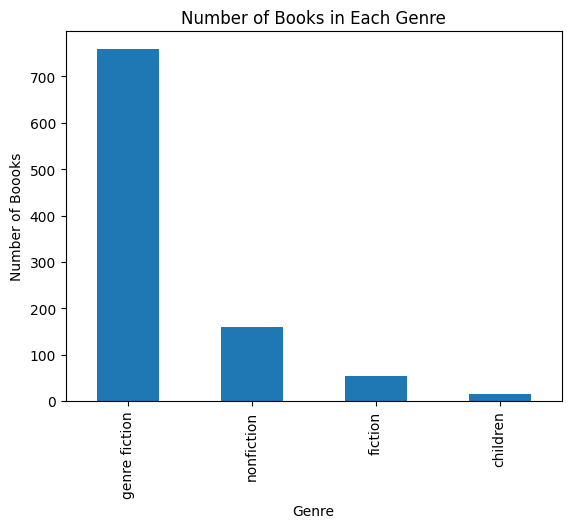

In [197]:
df["genre"].value_counts().plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Number of Boooks")
plt.title("Number of Books in Each Genre")
plt.show()

In [198]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

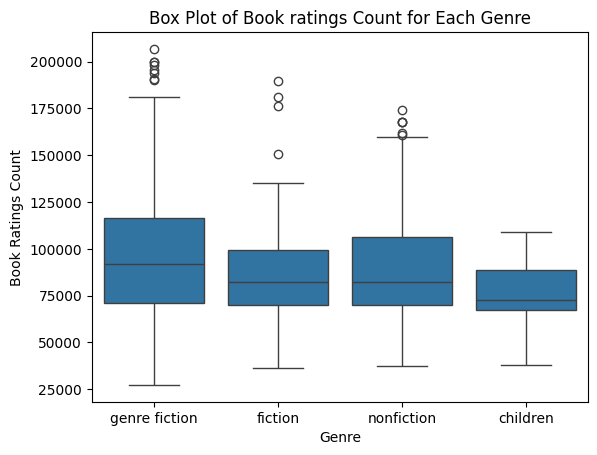

In [199]:
sns.boxplot(x = "genre", y = "Book_ratings_count", data = df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Box Plot of Book ratings Count for Each Genre")
plt.show()

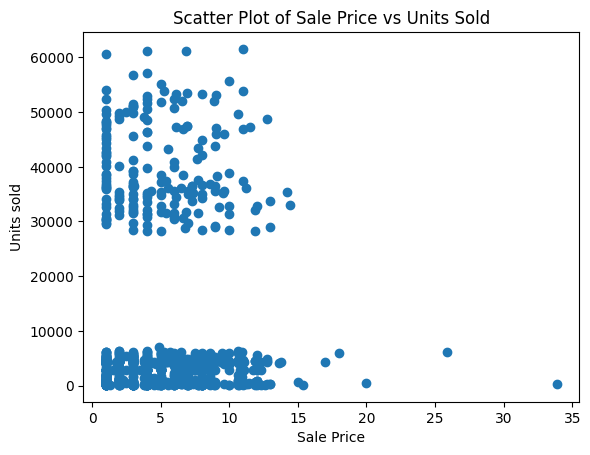

In [200]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units sold")
plt.title("Scatter Plot of Sale Price vs Units Sold")
plt.show()

# ¿Qué nos dice este gráfico?
# Cada punto representa un producto. 
# Si hay una tendencia descendente, podría indicar que precios más altos reducen las ventas (ley de demanda). 
# Si hay una tendencia ascendente, podría sugerir que productos más caros se venden más.

In [201]:
# df["language_code"].value_counts()
# Se usa en pandas para contar cuántas veces aparece cada 
# idioma en la columna "language_code" del DataFrame df

df["language_code"].value_counts().sort_values(ascending=True)
# Los ordeno modo ascendente

language_code
nl         1
spa        2
ara        2
fre        4
en-CA      7
en-GB     29
en-US    226
eng      670
Name: count, dtype: int64

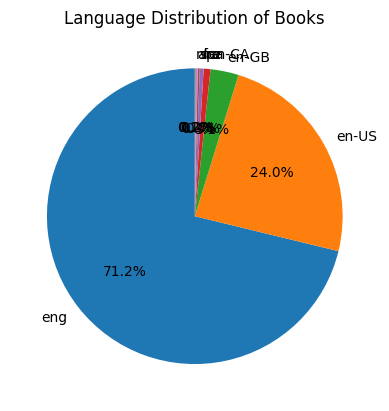

In [202]:
# Variable igual a número de veces que se repite cada dato en columna "language_code"
language_counts = df["language_code"].value_counts()

# Gráfico de pastel, rotado 90 grados y mostrando porcentajes con 1 decimal
plt.pie(language_counts, labels = language_counts.index, startangle = 90, autopct="%1.1f%%")
# Título del gráfico
plt.title("Language Distribution of Books")
# Gráfico generado
plt.show()

In [203]:
# Agrupamos por columna Publisher y mostramos tbien revenue sumando las cantidades dentro de
# grupo
df.groupby("Publisher ")["publisher revenue"].sum()

Publisher 
Amazon Digital Services,  Inc.          141767.772
Hachette Book Group                     107410.968
HarperCollins Christian Publishing        2135.670
HarperCollins Publishers                121769.814
HarperCollins Publishing                  2830.806
Macmillan                                31249.830
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Simon and Schuster Digital Sales Inc     46858.206
Name: publisher revenue, dtype: float64

In [204]:
# Agrupamos por columna Author_Rating y seleccionamos Book_ratings_count
# Calculamos promedio Book_ratings_count dentro de cada grupo Author_Rating
# Elegimos ordenar valores descendentemente y mostramos el valor máximo (mayor promedio calificación)
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False).max()

np.float64(101400.27256944444)

In [205]:
# Agrupamos por language_code y mostramos cuántas filas hay por cada grupo de idioma
# Ordenamos de forma descendente
df.groupby("language_code").size().sort_values(ascending = False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [206]:
# Calcula el promedio de "Book_ratings_count" dentro de cada grupo de "Author_Rating"
df.groupby("Author_Rating")["Book_ratings_count"].mean()

Author_Rating
Excellent        83804.800595
Famous           98295.250000
Intermediate    101400.272569
Novice           87318.464286
Name: Book_ratings_count, dtype: float64

In [207]:
# Libro con mayor número de calificaciones
df.groupby("Author_Rating")["Book_ratings_count"].max()

Author_Rating
Excellent       167848
Famous          206792
Intermediate    199872
Novice          155903
Name: Book_ratings_count, dtype: int64

In [208]:
# Cálculo de la media
df.groupby("Author_Rating")["Book_ratings_count"].median()

Author_Rating
Excellent       81609.5
Famous          90527.0
Intermediate    98254.5
Novice          77446.5
Name: Book_ratings_count, dtype: float64

In [209]:
# Cálculo del mínimo
df.groupby("Author_Rating")["Book_ratings_count"].min()

Author_Rating
Excellent       32626
Famous          54977
Intermediate    27308
Novice          42339
Name: Book_ratings_count, dtype: int64

In [210]:
# .std() en Python calcula la desviación estándar
"""Encuentras la media de los datos. Es el valor promedio.
Restas la media a cada valor individualmente, obteniendo 
la diferencia entre cada valor y la media.
Elevas al cuadrado cada una de esas diferencias 
(para que los valores negativos no se cancelen con los positivos).
Promedias esos valores elevados al cuadrado (esto se llama "varianza").
Finalmente, sacas la raíz cuadrada de ese valor promedio. 
Ese es el valor de la desviación estándar."""
df.groupby("Author_Rating")["Book_ratings_count"].std()

Author_Rating
Excellent       21023.456069
Famous          35036.475144
Intermediate    34210.096082
Novice          30859.612389
Name: Book_ratings_count, dtype: float64

In [211]:
# La varianza es muy similar a la desviación estándar, 
# pero en lugar de dar una medida de dispersión en 
# las mismas unidades que los datos, la varianza se mide 
# en las unidades al cuadrado de los datos originales.
df.groupby("Author_Rating")["Book_ratings_count"].var()

Author_Rating
Excellent       4.419857e+08
Famous          1.227555e+09
Intermediate    1.170331e+09
Novice          9.523157e+08
Name: Book_ratings_count, dtype: float64

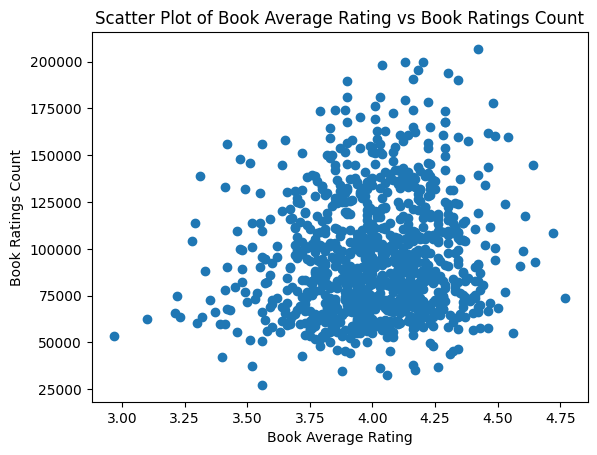

In [212]:
# Gráfico dispersión dos columnas
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
# Eje x
plt.xlabel("Book Average Rating")
# Eje y
plt.ylabel("Book Ratings Count")
# Título
plt.title("Scatter Plot of Book Average Rating vs Book Ratings Count")
# Mostrar
plt.show()

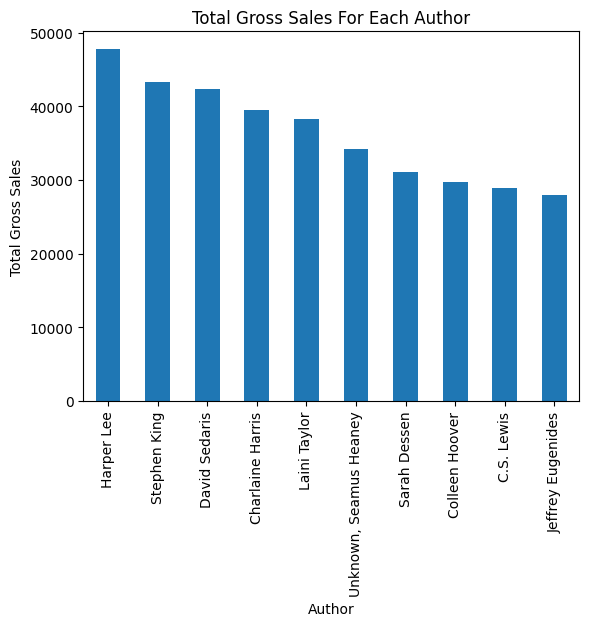

In [ ]:
# Variable igual a agrupación de autores clasificados por suma de ventas
# brutas
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()
# Orden descendente y mostrar 10 primeros de la lista
# Gráfico de barras (bar)
total_gross_sales_by_author.sort_values(ascending=False).head(10).plot(kind = "bar")
# Eje x
plt.xlabel("Author")
# Eje y
plt.ylabel("Total Gross Sales")
# Título
plt.title("Total Gross Sales For Each Author")
# Mostrar
plt.show()

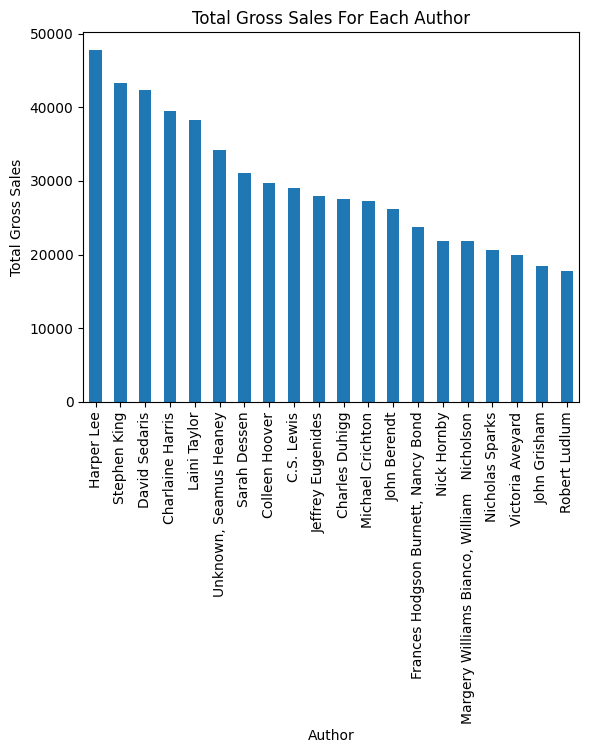

In [ ]:
# Gráfico barras con los 20 primeros 
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind = "bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales For Each Author")
plt.show()

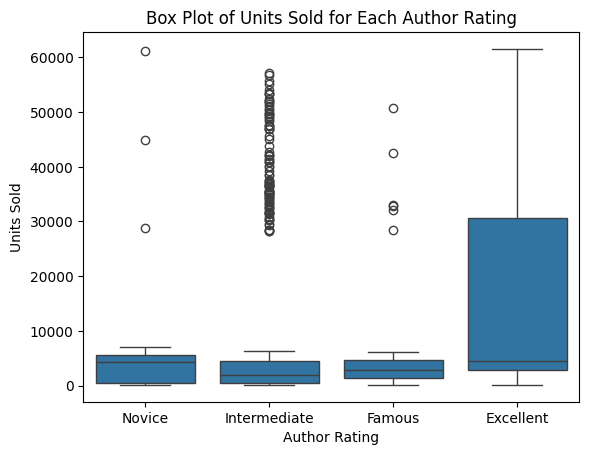

In [ ]:
# Gráfico de caja con seaborn, valores x e y y la fuente de información
sns.boxplot(x="Author_Rating", y = "units sold", data = df)
# Eje x
plt.xlabel("Author Rating")
# Eje y
plt.ylabel("Units Sold")
# Título
plt.title("Box Plot of Units Sold for Each Author Rating")
# Mostrar
plt.show()

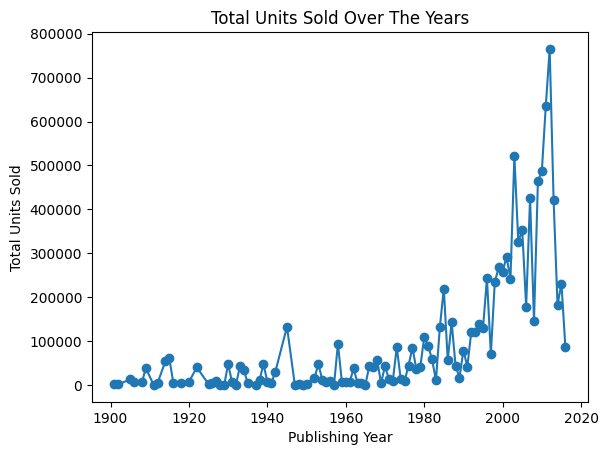

In [ ]:
# Esta línea genera un gráfico de línea que muestra 
# cómo han variado las unidades vendidas a lo largo de los 
# años, con un marcador en cada punto de datos. 
# Gráfico de línea con marcador circular
df.groupby("Publishing Year")["units sold"].sum().plot(kind = "line", marker = "o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over The Years")
plt.show()